In [97]:
pip install pyproj;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import pandas as pd
from IPython.core.display import Math
from numpy import mat

In [99]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)

In [100]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [101]:
from datetime import datetime

df['fec_not2']=pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2']=pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2']=pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2']=pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [102]:
import pyproj
P=pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [103]:
df['x'], df['y']=P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555


Sacar la distancia de cada punto hasta la alcaldia de Floridablanca, añadiendo una columna

In [104]:
x_alcaldia, y_alcaldia = P(-73.0861716627613, 7.0629502916083196)

df['distancia'] = ((x_alcaldia - df['x'])**2 + (y_alcaldia- df['y'])**2)**0.5
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y,distancia
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866,2311.379966
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103,2804.112415
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097,3070.761591
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608,725.053028
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374,2123.835294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977,1818.328553
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012,1943.308421
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264,3669.089479
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555,1214.202506


In [105]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object','datetime64'])
datosf = datosf.drop('año',axis=1)
datosf = datosf.drop('cod_pais_o',axis=1)
datosf = datosf.drop('condicion_final',axis=1)
datosf = datosf.drop('fecha_defuncion',axis=1)
datosf = datosf.drop('certif_defuncion',axis=1)

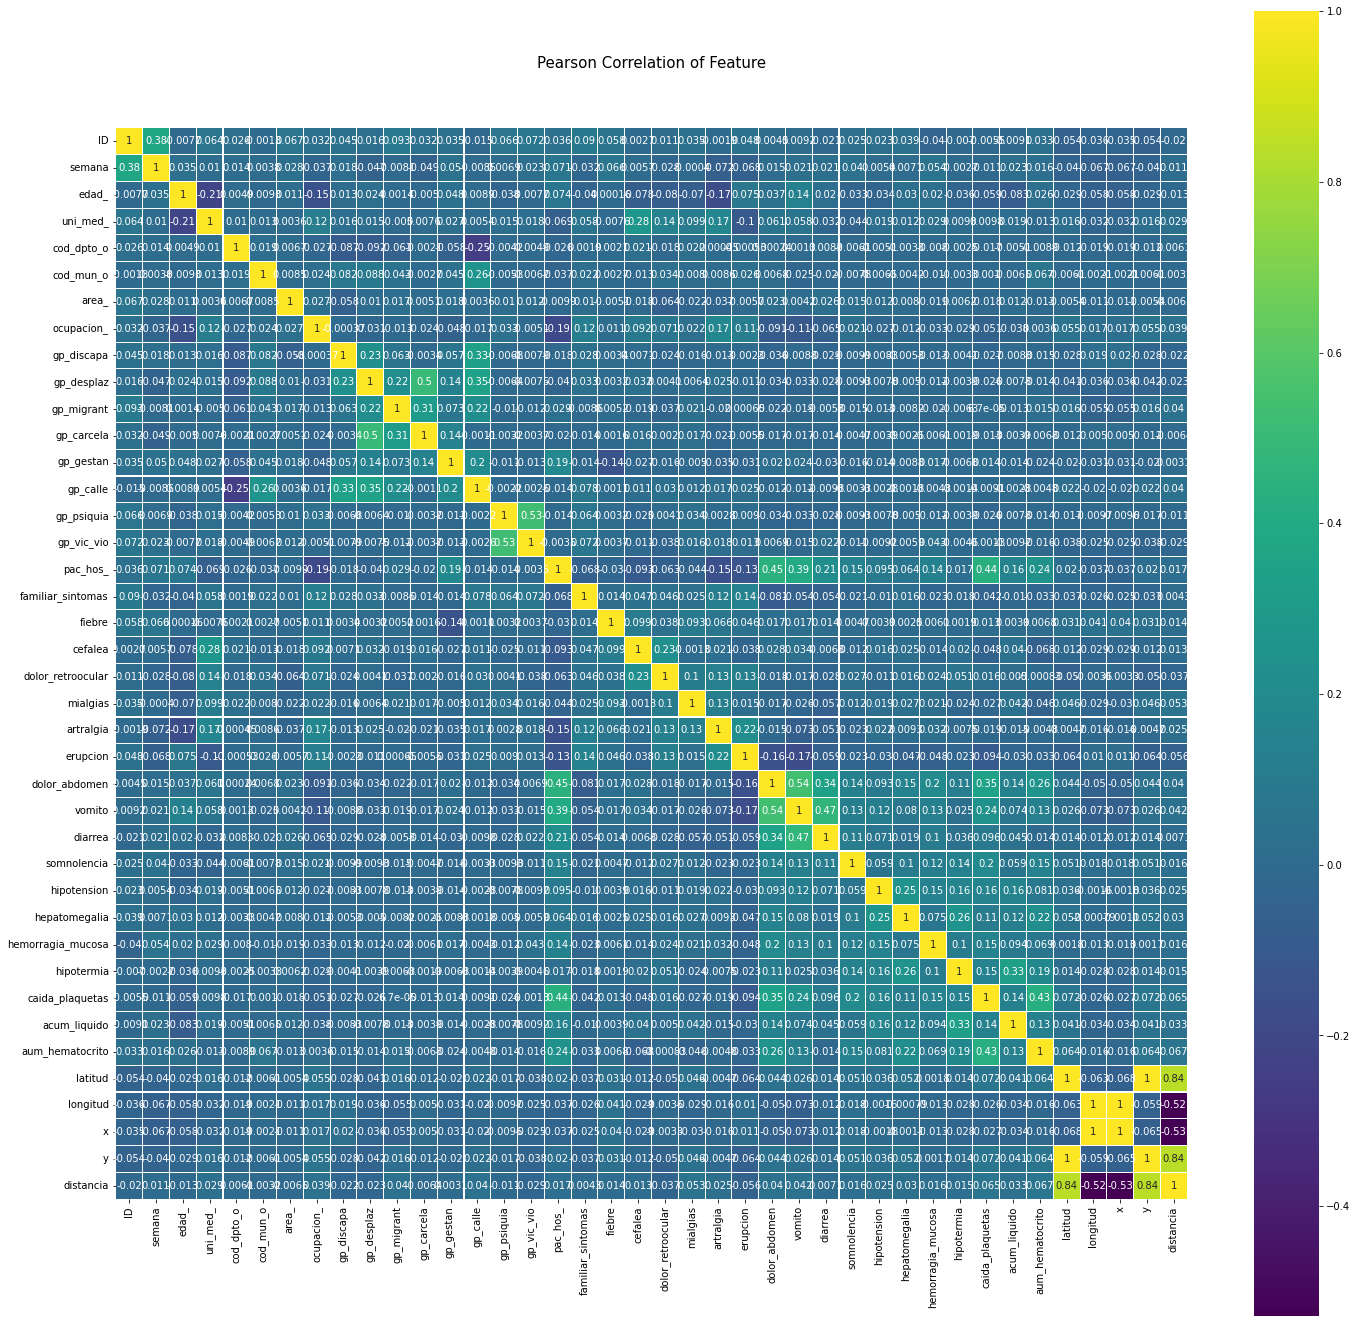

In [106]:
import matplotlib.pyplot as plt
import seaborn as sb 

colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Pearson Correlation of Feature', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [107]:
from math import ceil,floor

In [108]:
ab=100
res=10

print(df['x'].min()-ab)
print(df['y'].min()-ab)

print(df['x'].max()+ab)
print(df['y'].max()+ab)

707888.5715792507
780401.6340403266
712463.8865034583
785151.1759298786


In [109]:
from math import ceil

res=10

len_x=ceil((df['x'].max()-df['x'].min())/res)
len_y=ceil((df['y'].max()-df['y'].min())/res)
print (len_x)
print (len_y)

438
455


In [110]:
import numpy as np 
matriz=np.zeros((len_x,len_y))
print (matriz)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
from math import ceil, floor, e, pi

def casos(res, ab):
  res = res
  ab = ab
  
  minx = df['x'].min() - ab
  miny = df['y'].min() - ab
  maxx = df['x'].max() + ab
  maxy = df['y'].max() + ab

  len_x = ceil((maxx-minx)/res)
  len_y = ceil((maxy-miny)/res)

  matriz = [[0 for i in range(len_x)] for j in range(len_y)]

  for i in range(df.shape[0]):
    a = floor((df.loc[i, 'y'] - miny)/res)
    b = floor((df.loc[i, 'x'] - minx)/res)

    matriz[a][b] += 1

  return len_x, len_y, matriz

In [120]:
import numpy as np 
len_x, len_y, matriz = casos(10,100)
M1=np.zeros((len_x,len_y))
print (M1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [112]:
def paint(matriz):
  fig = plt.figure(figsize=(50, 40))

  ax = fig.add_subplot(111)
  ax.set_title('Mapa de calor')
  plt.imshow(matriz)
  ax.set_aspect('equal')

  cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
  cax.get_xaxis().set_visible(False)
  cax.get_yaxis().set_visible(False)
  cax.patch.set_alpha(0)
  cax.set_frame_on(False)
  plt.colorbar(orientation='vertical')
  plt.show()

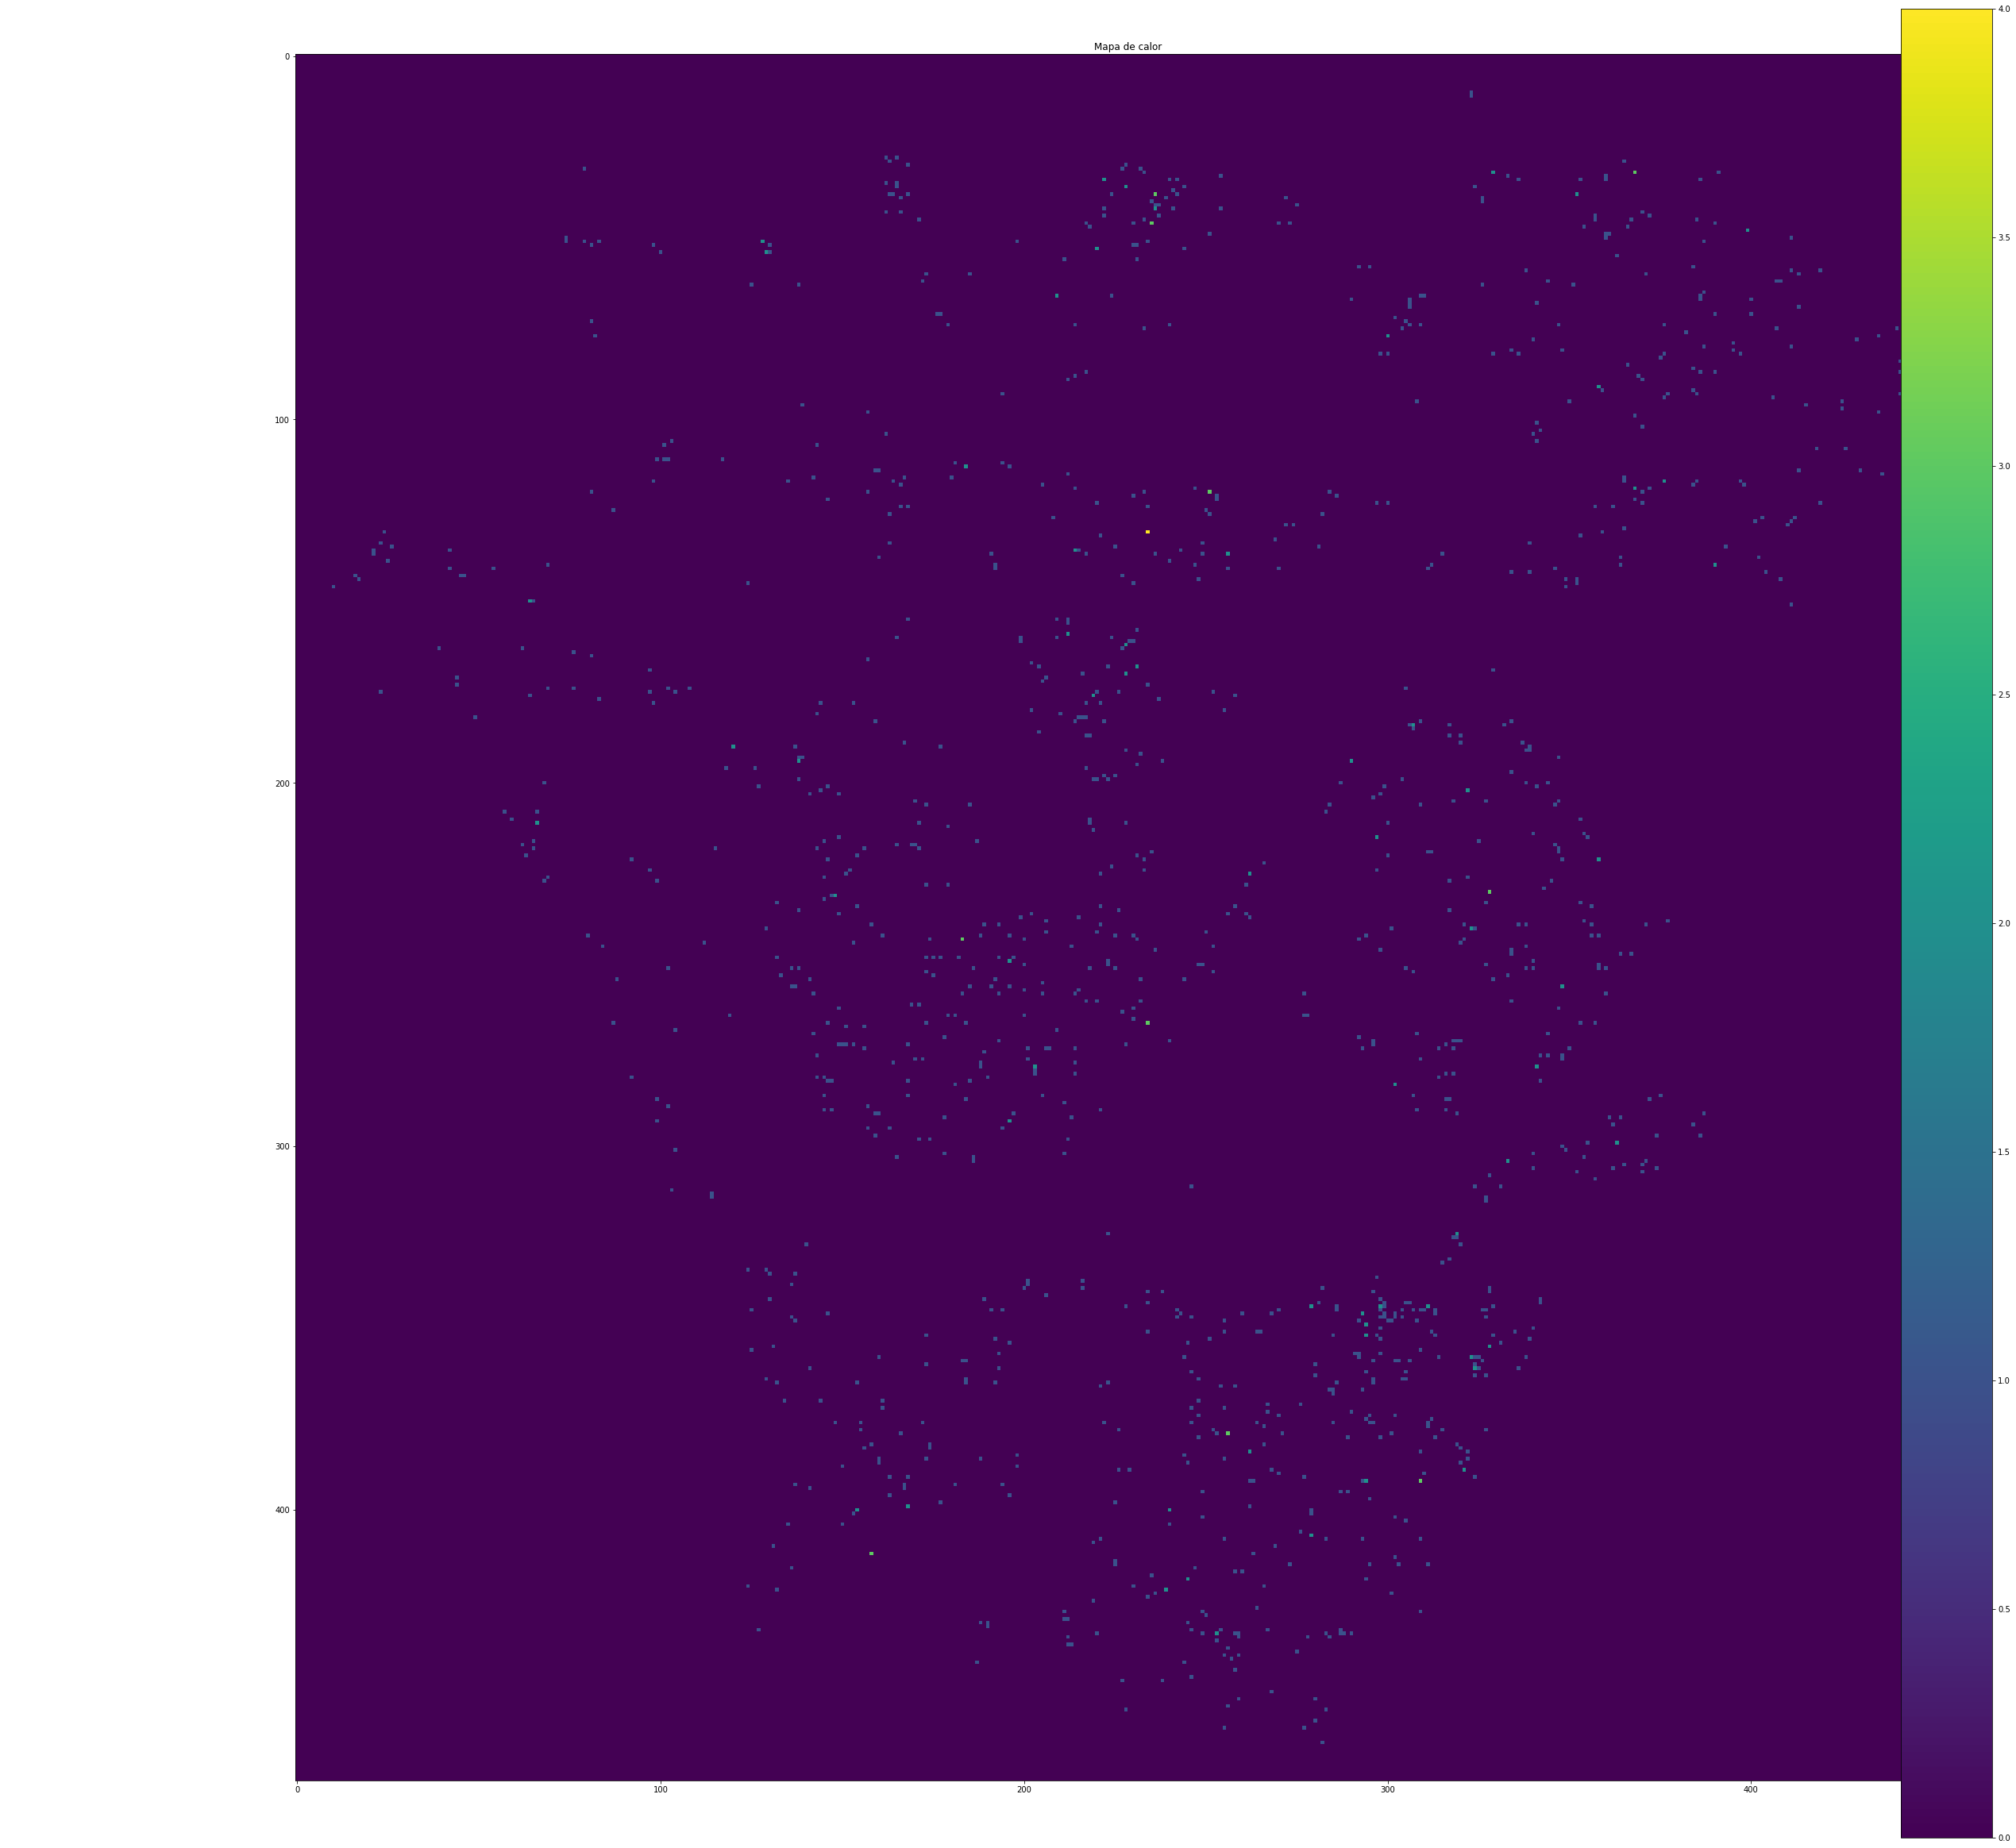

In [121]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 40))

ax = fig.add_subplot(111)
ax.set_title('Mapa de calor')
plt.imshow(matriz)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [114]:
def sumatoria(len_x, len_y):
  acumulado = [[0 for i in range(len_x)] for j in range(len_y)] 

  intr = int(ab/res)

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if(matriz[i][j] > 0):
        for k in range(i - intr, i + intr):
          for l in range(j - intr, j + intr):
            dist = (sqrt((i - k)**2+(j-l)**2)) * res
            if(dist < ab):
              acumulado[k][l] += matriz[i][j]
  
  return acumulado

**Formulas**

In [115]:
#Uniforme

def uniforme():
  y = 0.5
  return y

In [116]:
# Triangular 

def triangular(x):
  y = 1 - abs(x/ab)
  return y

In [117]:
#Gaussiana

def gaussiana(x):
  y = (e**(-(((x/ab)**2)/2)))/(sqrt(2*pi))
  return y

In [118]:
#Espanechnikov

def epanechnikov(x):
  y = (3/4)*(1 - (x/ab)**2)
  return y

In [119]:
#Varianza Minima

def varianza_minima(x):
  y = (3/8)*(3 - 5*(x/ab)**2)
  return y